In [2]:
import pandas as pd 
import numpy as numpy
import matplotlib.pyplot as plt
import warnings
import os 
import chardet
import seaborn as sns
import plotly.express as px
plt.rcParams['font.family'] = 'Malgun Gothic'

warnings.filterwarnings("ignore")

In [3]:
from sklearn.cluster import KMeans

In [4]:
rawdata = open('서울시 지하철 호선별 역별 시간대별 승하차 인원 정보.csv', 'rb').read()
result = chardet.detect(rawdata)
print(result)


{'encoding': 'EUC-KR', 'confidence': 0.99, 'language': 'Korean'}


In [5]:
data = pd.read_csv('서울시 지하철 호선별 역별 시간대별 승하차 인원 정보.csv', encoding=result['encoding'])


In [6]:
data.head()

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
0,202410,1호선,동대문,634,22,12458,1990,10170,7253,16816,...,9969,771,2838,4,231,0,0,0,0,20241103
1,202410,1호선,동묘앞,223,4,3169,1026,3758,5319,9258,...,4882,106,1831,0,263,0,0,0,0,20241103
2,202410,1호선,서울역,573,9,8623,9367,14928,61884,42711,...,13969,2848,3802,1,207,0,0,0,0,20241103
3,202410,1호선,시청,84,1,2078,5753,4249,30299,8265,...,3775,506,979,1,41,0,0,0,0,20241103
4,202410,1호선,신설동,384,22,9813,2340,10345,10232,22756,...,9779,375,2781,0,1,0,1,0,0,20241103


# 데이터 전처리

In [7]:
# 날짜 컬럼 추가하기
data['연도'] = pd.to_datetime(data['사용월'], format='%Y%m').dt.year
data['월'] = pd.to_datetime(data['사용월'], format='%Y%m').dt.month

data.head()

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자,연도,월
0,202410,1호선,동대문,634,22,12458,1990,10170,7253,16816,...,2838,4,231,0,0,0,0,20241103,2024,10
1,202410,1호선,동묘앞,223,4,3169,1026,3758,5319,9258,...,1831,0,263,0,0,0,0,20241103,2024,10
2,202410,1호선,서울역,573,9,8623,9367,14928,61884,42711,...,3802,1,207,0,0,0,0,20241103,2024,10
3,202410,1호선,시청,84,1,2078,5753,4249,30299,8265,...,979,1,41,0,0,0,0,20241103,2024,10
4,202410,1호선,신설동,384,22,9813,2340,10345,10232,22756,...,2781,0,1,0,1,0,0,20241103,2024,10


In [8]:
data['연도'].unique()

array([2024, 2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015],
      dtype=int32)

In [9]:
data = data.query('호선명 == "2호선" and 연도 >= 2010')

In [10]:
#지하철역명 통일
sorted(data['지하철역'].unique())

['강남',
 '강변',
 '강변(동서울터미널)',
 '건대입구',
 '교대',
 '교대(법원.검찰청)',
 '구로디지털단지',
 '구의',
 '구의(광진구청)',
 '낙성대',
 '낙성대(강감찬)',
 '당산',
 '대림',
 '대림(구로구청)',
 '도림천',
 '동대문역사문화공원',
 '동대문역사문화공원(DDP)',
 '뚝섬',
 '문래',
 '방배',
 '봉천',
 '사당',
 '삼성',
 '삼성(무역센터)',
 '상왕십리',
 '서울대입구',
 '서울대입구(관악구청)',
 '서초',
 '선릉',
 '성수',
 '시청',
 '신답',
 '신당',
 '신대방',
 '신도림',
 '신림',
 '신설동',
 '신정네거리',
 '신천',
 '신촌',
 '아현',
 '양천구청',
 '역삼',
 '영등포구청',
 '왕십리(성동구청)',
 '용답',
 '용두',
 '용두(동대문구청)',
 '을지로3가',
 '을지로4가',
 '을지로입구',
 '이대',
 '잠실',
 '잠실(송파구청)',
 '잠실나루',
 '잠실새내',
 '종합운동장',
 '충정로',
 '충정로(경기대입구)',
 '한양대',
 '합정',
 '홍대입구']

In [11]:
data['지하철역'] = [i[0] for i in data['지하철역'].str.split('(')]
sorted(data['지하철역'].unique())

['강남',
 '강변',
 '건대입구',
 '교대',
 '구로디지털단지',
 '구의',
 '낙성대',
 '당산',
 '대림',
 '도림천',
 '동대문역사문화공원',
 '뚝섬',
 '문래',
 '방배',
 '봉천',
 '사당',
 '삼성',
 '상왕십리',
 '서울대입구',
 '서초',
 '선릉',
 '성수',
 '시청',
 '신답',
 '신당',
 '신대방',
 '신도림',
 '신림',
 '신설동',
 '신정네거리',
 '신천',
 '신촌',
 '아현',
 '양천구청',
 '역삼',
 '영등포구청',
 '왕십리',
 '용답',
 '용두',
 '을지로3가',
 '을지로4가',
 '을지로입구',
 '이대',
 '잠실',
 '잠실나루',
 '잠실새내',
 '종합운동장',
 '충정로',
 '한양대',
 '합정',
 '홍대입구']

In [12]:
# 승차인원은 어느정도 되는지 찾기

on_col = [i for i in data.columns if '승차' in i]
data = data[['사용월', '연도', '월', '지하철역']+on_col]

data.head()

,사용월,연도,월,지하철역,04시-05시 승차인원,05시-06시 승차인원,06시-07시 승차인원,07시-08시 승차인원,08시-09시 승차인원,09시-10시 승차인원,...,18시-19시 승차인원,19시-20시 승차인원,20시-21시 승차인원,21시-22시 승차인원,22시-23시 승차인원,23시-24시 승차인원,00시-01시 승차인원,01시-02시 승차인원,02시-03시 승차인원,03시-04시 승차인원
10,202410,2024,10,강남,148,8113,18052,39807,62260,55503,...,310065,209257,162387,176696,152466,68924,11657,6,0,0
11,202410,2024,10,강변,26,9024,24246,67440,102900,76719,...,58419,42867,34716,29271,17463,6071,782,0,0,0
12,202410,2024,10,건대입구,363,15774,22857,55025,92401,65147,...,90451,69703,71638,73845,70545,41354,6663,8,2,0
13,202410,2024,10,교대,19,2952,11484,25562,37053,30507,...,131212,62845,53653,50617,41006,15543,2886,8,0,0
14,202410,2024,10,구로디지털단지,510,42932,55377,139962,184466,119390,...,197052,98596,62594,50983,39644,18273,3198,3,0,0


In [13]:
data.columns

Index(['사용월', '연도', '월', '지하철역', '04시-05시 승차인원', '05시-06시 승차인원',
       '06시-07시 승차인원', '07시-08시 승차인원', '08시-09시 승차인원', '09시-10시 승차인원',
       '10시-11시 승차인원', '11시-12시 승차인원', '12시-13시 승차인원', '13시-14시 승차인원',
       '14시-15시 승차인원', '15시-16시 승차인원', '16시-17시 승차인원', '17시-18시 승차인원',
       '18시-19시 승차인원', '19시-20시 승차인원', '20시-21시 승차인원', '21시-22시 승차인원',
       '22시-23시 승차인원', '23시-24시 승차인원', '00시-01시 승차인원', '01시-02시 승차인원',
       '02시-03시 승차인원', '03시-04시 승차인원'],
      dtype='object')

# 데이터 분석

[1] 승하차 인원이 가장 많은 역

In [14]:
# 합계 컬럼 추가하기 
data['합계'] = data[on_col].sum(axis=1)
data.head()

,사용월,연도,월,지하철역,04시-05시 승차인원,05시-06시 승차인원,06시-07시 승차인원,07시-08시 승차인원,08시-09시 승차인원,09시-10시 승차인원,...,19시-20시 승차인원,20시-21시 승차인원,21시-22시 승차인원,22시-23시 승차인원,23시-24시 승차인원,00시-01시 승차인원,01시-02시 승차인원,02시-03시 승차인원,03시-04시 승차인원,합계
10,202410,2024,10,강남,148,8113,18052,39807,62260,55503,...,209257,162387,176696,152466,68924,11657,6,0,0,2267800
11,202410,2024,10,강변,26,9024,24246,67440,102900,76719,...,42867,34716,29271,17463,6071,782,0,0,0,879415
12,202410,2024,10,건대입구,363,15774,22857,55025,92401,65147,...,69703,71638,73845,70545,41354,6663,8,2,0,1136920
13,202410,2024,10,교대,19,2952,11484,25562,37053,30507,...,62845,53653,50617,41006,15543,2886,8,0,0,873447
14,202410,2024,10,구로디지털단지,510,42932,55377,139962,184466,119390,...,98596,62594,50983,39644,18273,3198,3,0,0,1663746


In [15]:
# 지하철역별 월평균 승차 인원 찾기
mean_data = data.groupby('지하철역')[['합계']].mean().reset_index().rename({'합계':'월평균'},axis=1).sort_values('월평균', ascending=False)
mean_data


,지하철역,월평균
0,강남,2.627498e+06
43,잠실,2.334455e+06
50,홍대입구,2.057443e+06
27,신림,1.906915e+06
4,구로디지털단지,1.731064e+06
26,신도림,1.613138e+06
16,삼성,1.577391e+06
20,선릉,1.530646e+06
18,서울대입구,1.453812e+06
41,을지로입구,1.333915e+06


In [16]:
fig = px.bar(data_frame = mean_data, 
             x='지하철역', 
             y='월평균',
             title='지하철역별 월평균 승차인원')
fig.show()

[2] 연도별로 혹은 월별로 승하차 인원 추 사이의 차이

In [17]:
data.head()

,사용월,연도,월,지하철역,04시-05시 승차인원,05시-06시 승차인원,06시-07시 승차인원,07시-08시 승차인원,08시-09시 승차인원,09시-10시 승차인원,...,19시-20시 승차인원,20시-21시 승차인원,21시-22시 승차인원,22시-23시 승차인원,23시-24시 승차인원,00시-01시 승차인원,01시-02시 승차인원,02시-03시 승차인원,03시-04시 승차인원,합계
10,202410,2024,10,강남,148,8113,18052,39807,62260,55503,...,209257,162387,176696,152466,68924,11657,6,0,0,2267800
11,202410,2024,10,강변,26,9024,24246,67440,102900,76719,...,42867,34716,29271,17463,6071,782,0,0,0,879415
12,202410,2024,10,건대입구,363,15774,22857,55025,92401,65147,...,69703,71638,73845,70545,41354,6663,8,2,0,1136920
13,202410,2024,10,교대,19,2952,11484,25562,37053,30507,...,62845,53653,50617,41006,15543,2886,8,0,0,873447
14,202410,2024,10,구로디지털단지,510,42932,55377,139962,184466,119390,...,98596,62594,50983,39644,18273,3198,3,0,0,1663746


In [18]:
data.query('연도 <= 2024').groupby(['연도'])[['합계']].sum().reset_index()

,연도,합계
0,2015,565354512
1,2016,561807789
2,2017,553074794
3,2018,556124147
4,2019,559488134
5,2020,397139151
6,2021,391591285
7,2022,441861856
8,2023,481049461
9,2024,407972620


In [19]:
year_sum = (data[data['연도'] <= 2024]
           .groupby('연도')
           .agg({'합계': 'sum'})
           .reset_index()
           .assign(연도=lambda x: x['연도'].astype(str)))

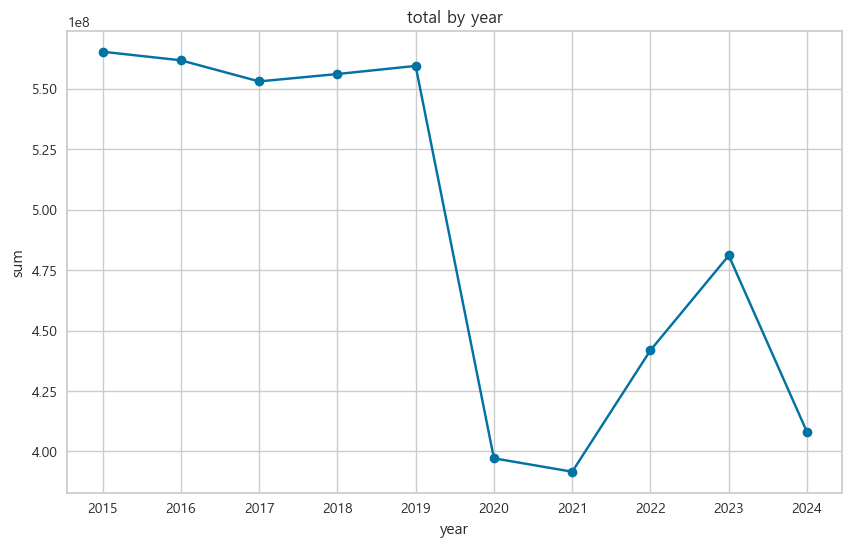

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(year_sum['연도'], year_sum['합계'], marker='o')
plt.title('total by year')
plt.xlabel('year')
plt.ylabel('sum')
plt.show()

In [21]:
month_sum = data.query('연도 <= 2024').groupby(['월'])[['합계']].sum().reset_index()
month_sum['월'] = month_sum['월'].astype(str)

fig = px.line(data_frame=month_sum, x='월', y='합계')
fig.show()

[3] 시간대별로 가장 승하차 인원이 많은 역 찾기

In [22]:
top10 = mean_data.sort_values('월평균', ascending=False).head(10)['지하철역']

In [23]:
top10_m_h = data.query('지하철역 in @top10').groupby('지하철역')[on_col].mean()
top10_m_h.columns = [i[:3] for i in top10_m_h.columns]

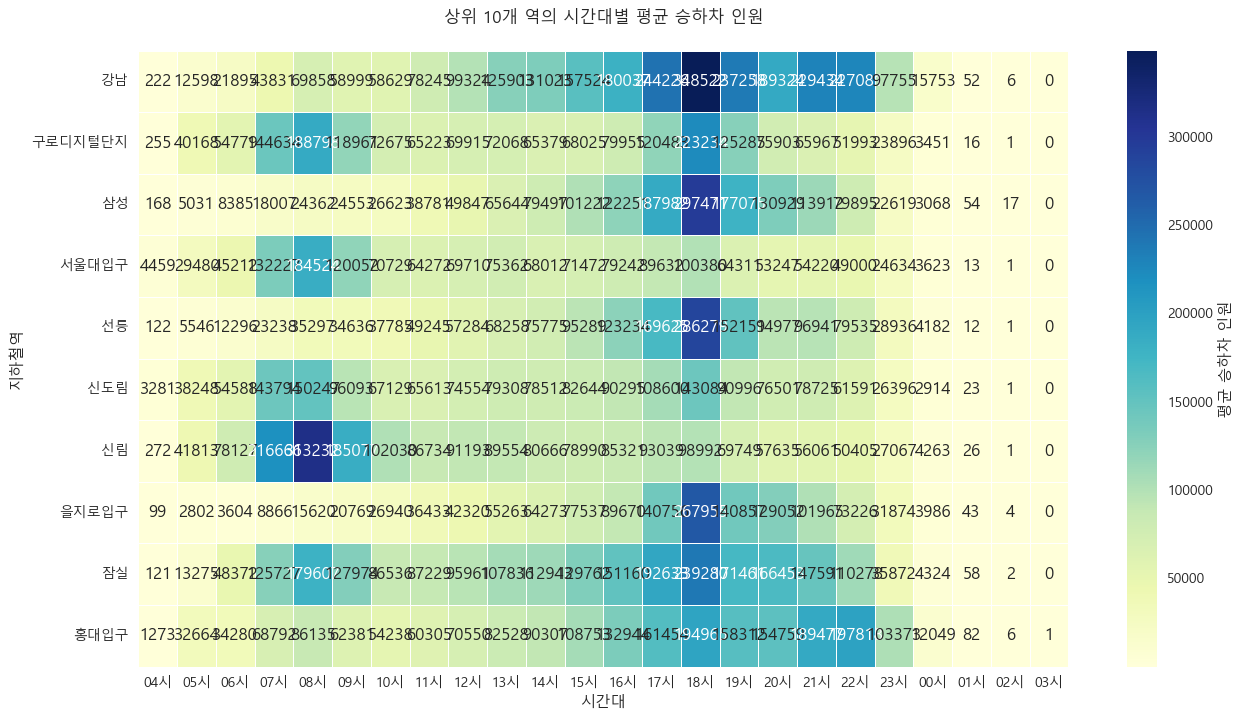

In [24]:
plt.figure(figsize=(15, 8))
sns.heatmap(top10_m_h, 
            annot=True,            
            fmt='.0f',             
            cmap='YlGnBu',         
            cbar_kws={'label': '평균 승하차 인원'},
            linewidths=0.5)


plt.title('상위 10개 역의 시간대별 평균 승하차 인원', pad=20)
plt.xlabel('시간대')
plt.ylabel('지하철역')
plt.show()

In [25]:
# 행을 기준으로 히트맵 생성하기 
top10_m_h.style.background_gradient(cmap='Greens', axis=1).format('{:.0f}')

,04시,05시,06시,07시,08시,09시,10시,11시,12시,13시,14시,15시,16시,17시,18시,19시,20시,21시,22시,23시,00시,01시,02시,03시
지하철역,,,,,,,,,,,,,,,,,,,,,,,,
강남,222,12598,21895,43831,69858,58999,58629,78245,99324,125903,131023,157524,180037,244226,348522,237258,189324,229434,227081,97755,15753,52,6,0
구로디지털단지,255,40168,54779,144634,188798,118961,72675,65223,69915,72068,65379,68025,79955,120483,223234,125285,75903,65967,51993,23896,3451,16,1,0
삼성,168,5031,8385,18007,24362,24553,26623,38781,49847,65644,79497,101222,122251,187982,297471,177075,130929,113912,79895,22619,3068,54,17,0
서울대입구,4459,29480,45212,132227,184524,120052,70729,64272,69710,75362,68012,71472,79242,89632,100380,64311,53247,54220,49000,24634,3623,13,1,0
선릉,122,5546,12296,23238,35297,34636,37785,49245,57284,68258,75775,95289,123234,169625,286279,152151,94977,96941,79535,28936,4182,12,1,0
신도림,3281,38248,54588,143794,150247,96093,67129,65613,74554,79308,78512,82644,90295,108600,143084,90996,76501,78725,61591,26396,2914,23,1,0
신림,272,41813,78127,216666,313232,185077,102030,86734,91193,89554,80666,78990,85321,93039,98992,69749,57635,56061,50405,27067,4263,26,1,0
을지로입구,99,2802,3604,8866,15620,20769,26940,36433,42320,55263,64273,77537,89670,140756,267955,140857,129052,101965,73226,31874,3986,43,4,0
잠실,121,13275,48372,125727,179607,127974,86536,87229,95961,107836,112943,129762,151160,192633,239280,171461,166453,147591,110278,35872,4324,58,2,0


[4] 지하철역 시간대별 인원 유형 클러스터링


In [26]:
from yellowbrick.cluster import KElbowVisualizer

In [27]:
h_m = data.groupby('지하철역')[on_col].mean()
h_m.columns = [i[:3] for i in h_m.columns]
h_m_pct = h_m.div(h_m.sum(axis=1), axis=0)

In [ ]:
model = KMeans() 
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(h_m_pct)

In [29]:
k = 3
model = KMeans(n_clusters = k, random_state = 10)
model.fit(h_m_pct)
h_m_pct['cluster'] = model.fit_predict(h_m_pct).astype(str)

In [30]:
fig = px.scatter(data_frame = h_m_pct[['08시', '18시', 'cluster']].reset_index(), 
                 x = '08시',
                 y = '18시',
                 color = 'cluster',
                 title = '시간대별 승차 인원 클러스터링',
                 width = 800,
                 height = 400
                 )
fig.show()

In [31]:
for i in range(k):
    print(f'cluster {i}')
    print(list(h_m_pct.query(f'cluster =="{i}"').index))

cluster 0
['강남', '교대', '뚝섬', '삼성', '서초', '선릉', '성수', '시청', '역삼', '을지로3가', '을지로4가', '을지로입구', '한양대']
cluster 1
['강변', '구로디지털단지', '구의', '낙성대', '당산', '대림', '도림천', '봉천', '상왕십리', '서울대입구', '신답', '신당', '신대방', '신도림', '신림', '신정네거리', '신천', '아현', '양천구청', '용답', '용두', '잠실나루', '잠실새내']
cluster 2
['건대입구', '동대문역사문화공원', '문래', '방배', '사당', '신설동', '신촌', '영등포구청', '왕십리', '이대', '잠실', '종합운동장', '충정로', '합정', '홍대입구']


[5] 분석결과를 지도로 시각화하기

In [32]:
seoul = pd.read_csv('서울시 역사마스터 정보.csv', encoding='cp949')


In [33]:
seoul.head()

,역사_ID,역사명,호선,위도,경도
0,9996,미사,5호선,37.560927,127.193877
1,9995,강일,5호선,37.557490,127.175930
2,4929,김포공항,김포골드라인,37.562360,126.801868
3,4928,고촌,김포골드라인,37.601243,126.770345
4,4927,풍무,김포골드라인,37.612488,126.732387


In [34]:
seoul = seoul.query('호선 == "2호선"')
seoul['역사명'] = [i[0] for i in seoul['역사명'].str.split('(')] 
seoul.rename({'역사명':'지하철역'}, axis=1, inplace=True)
seoul

,역사_ID,지하철역,호선,위도,경도
708,250,용두,2호선,37.574028,127.038091
709,249,신정네거리,2호선,37.520074,126.852912
710,248,양천구청,2호선,37.512398,126.865819
711,247,도림천,2호선,37.514287,126.882768
712,246,신설동,2호선,37.574747,127.024932
713,245,신답,2호선,37.570040,127.046481
714,244,용답,2호선,37.561904,127.050899
715,243,충정로,2호선,37.559704,126.964378
716,242,아현,2호선,37.557345,126.956141
717,241,이대,2호선,37.556733,126.946013


In [35]:
h_m_merge = h_m.reset_index()[['지하철역','08시','18시']]
seoul_m = seoul[['지하철역', '위도','경도']]
h_m_seoul = pd.merge(h_m_merge, seoul_m, on='지하철역')

In [36]:
seoul_h_m = h_m.reset_index().merge(seoul[['지하철역','위도','경도']], on='지하철역')
seoul_h_m.head()

,지하철역,04시,05시,06시,07시,08시,09시,10시,11시,12시,...,20시,21시,22시,23시,00시,01시,02시,03시,위도,경도
0,강남,222.186441,12597.932203,21894.932203,43830.788136,69857.940678,58999.203390,58628.796610,78245.466102,99324.288136,...,189324.423729,229434.000000,227080.644068,97754.957627,15753.161017,51.652542,6.355932,0.355932,37.497990,127.027912
1,강변,31.974576,9415.906780,28910.915254,88145.491525,129231.483051,94970.305085,75147.296610,70067.762712,67398.805085,...,51619.805085,44474.059322,31915.135593,12612.144068,1627.245763,14.398305,0.686441,0.000000,37.535095,127.094681
2,건대입구,348.906780,18662.449153,24858.101695,59249.966102,100996.771186,67139.313559,41233.550847,40207.415254,47175.466102,...,75310.203390,86403.669492,86538.703390,50725.762712,7747.949153,38.118644,2.381356,0.161017,37.540373,127.069191
3,교대,22.067797,2860.025424,13100.415254,27154.483051,39192.050847,32250.228814,30804.711864,37257.830508,39999.627119,...,58660.677966,65036.220339,59694.152542,21246.711864,3600.635593,10.008475,0.855932,0.025424,37.493961,127.014667
4,구로디지털단지,254.686441,40167.881356,54779.059322,144634.474576,188797.635593,118961.101695,72675.067797,65223.262712,69915.237288,...,75902.940678,65967.118644,51993.059322,23896.406780,3451.474576,16.500000,0.881356,0.067797,37.485266,126.901401


In [37]:
import folium
from folium import plugins

In [38]:
center = [37.541, 126.986]

In [39]:
m = folium.Map(location=center, zoom_start=12)
m.add_child(plugins.HeatMap(zip(h_m_seoul['위도'], h_m_seoul['경도'], h_m_seoul['08시'])))
m

In [40]:

m.save('subway_heatmap.html')

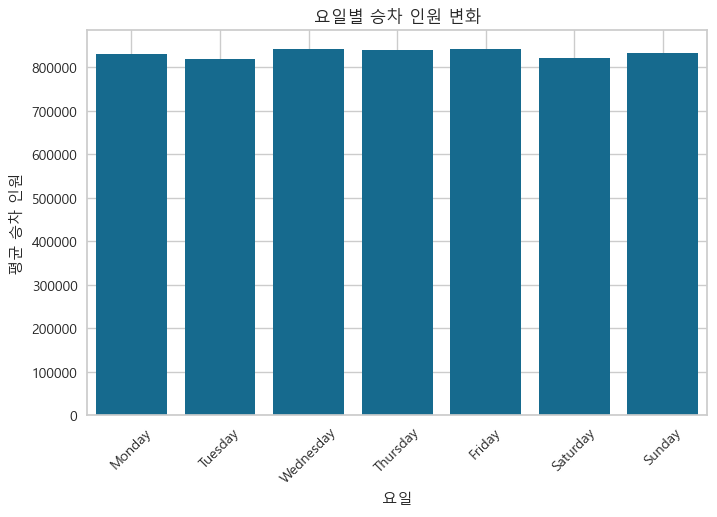

In [42]:
# 요일별 승하차 인원은 어느정도 변화가 있는가

data['날짜'] = pd.to_datetime(data['사용월'], format='%Y%m')
data['요일'] = data['날짜'].dt.day_name()

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_mean = data.groupby('요일')[on_col].mean().reindex(day_order)
day_mean = day_mean.sum(axis=1)

plt.figure(figsize=(8, 5))
sns.barplot(x=day_mean.index, y=day_mean.values)
plt.title('요일별 승차 인원 변화')
plt.xlabel('요일')
plt.ylabel('평균 승차 인원')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

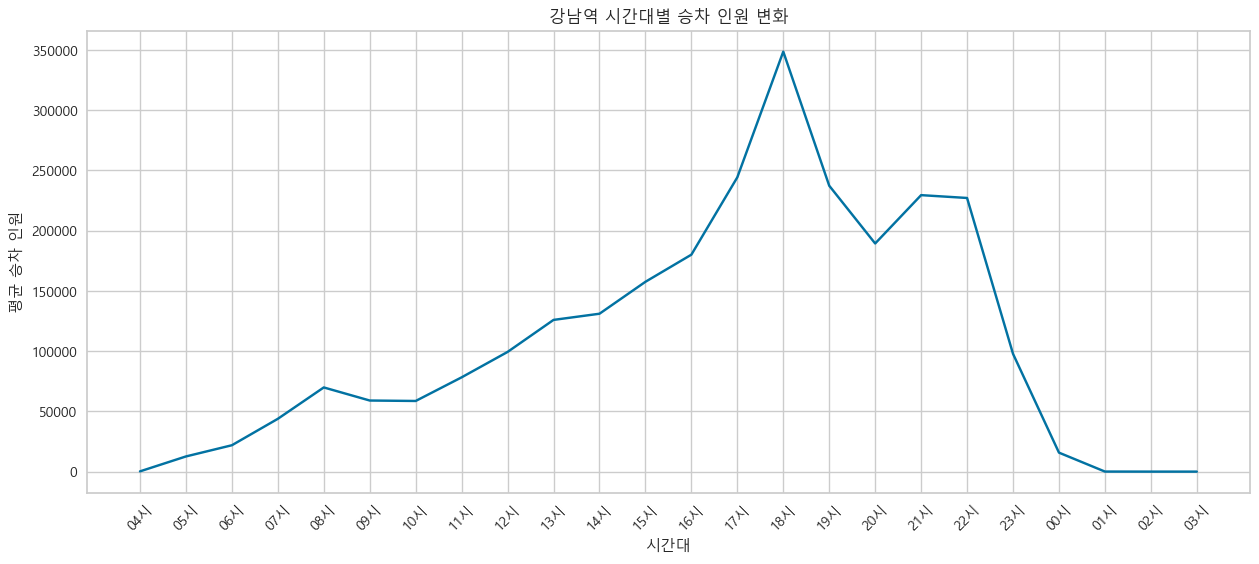

In [ ]:
station_time_mean = data.groupby('지하철역')[on_col].mean()
station_time_mean.columns = [i[:3] for i in station_time_mean.columns]

station = '강남'
plt.figure(figsize=(15, 6))
sns.lineplot(data=station_time_mean.loc[station])
plt.title(f'{station}역 시간대별 승차 인원 변화')
plt.xlabel('시간대')
plt.ylabel('평균 승차 인원')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


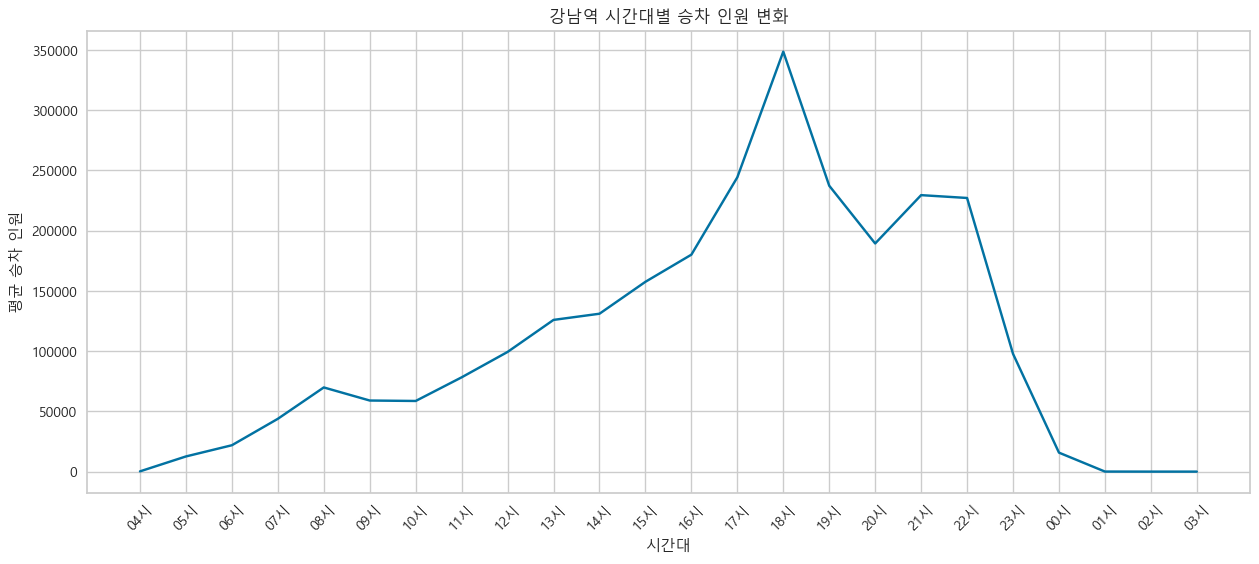

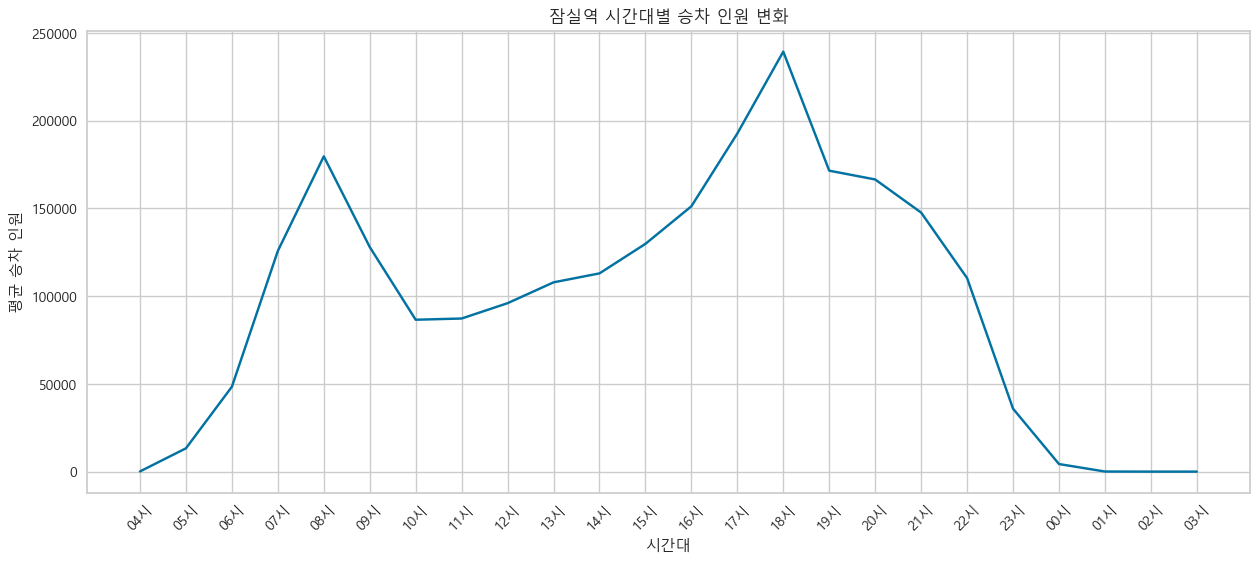

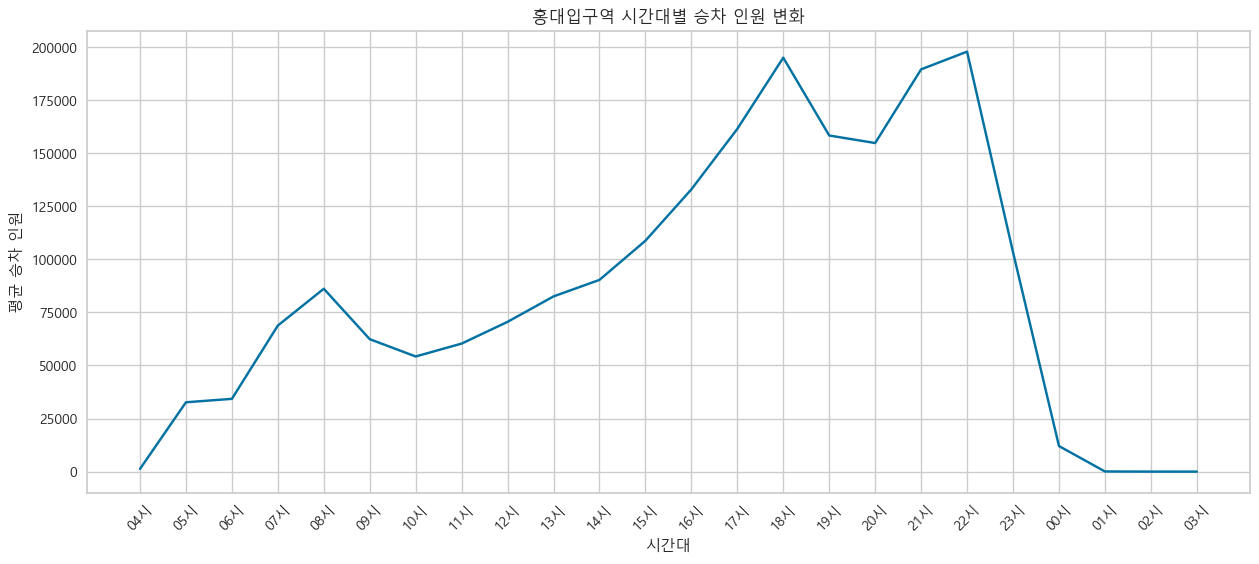

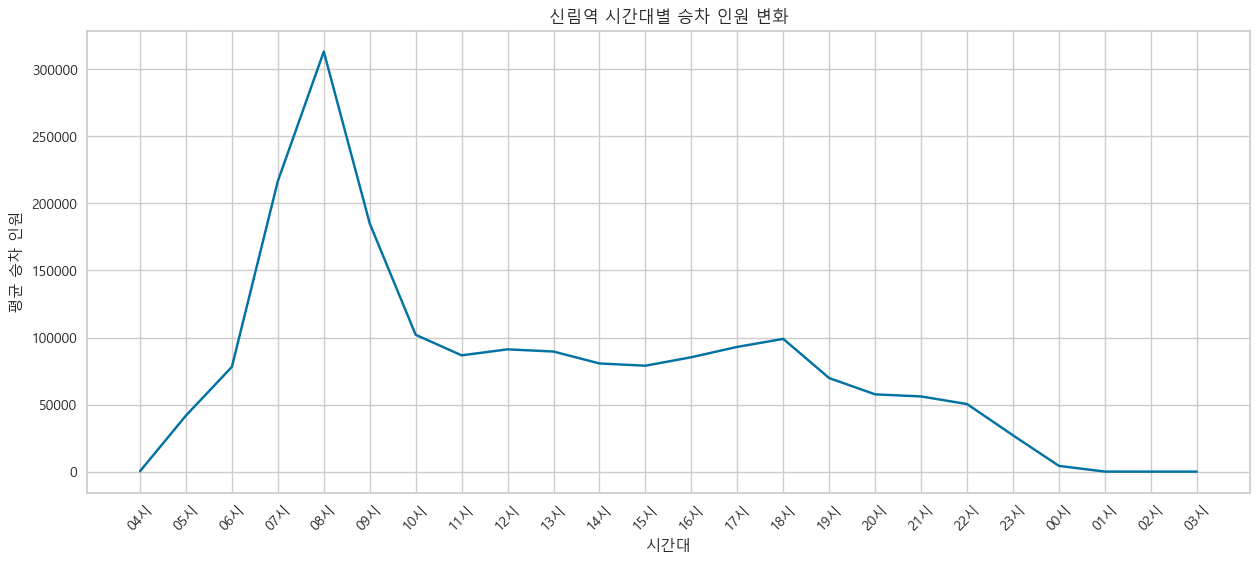

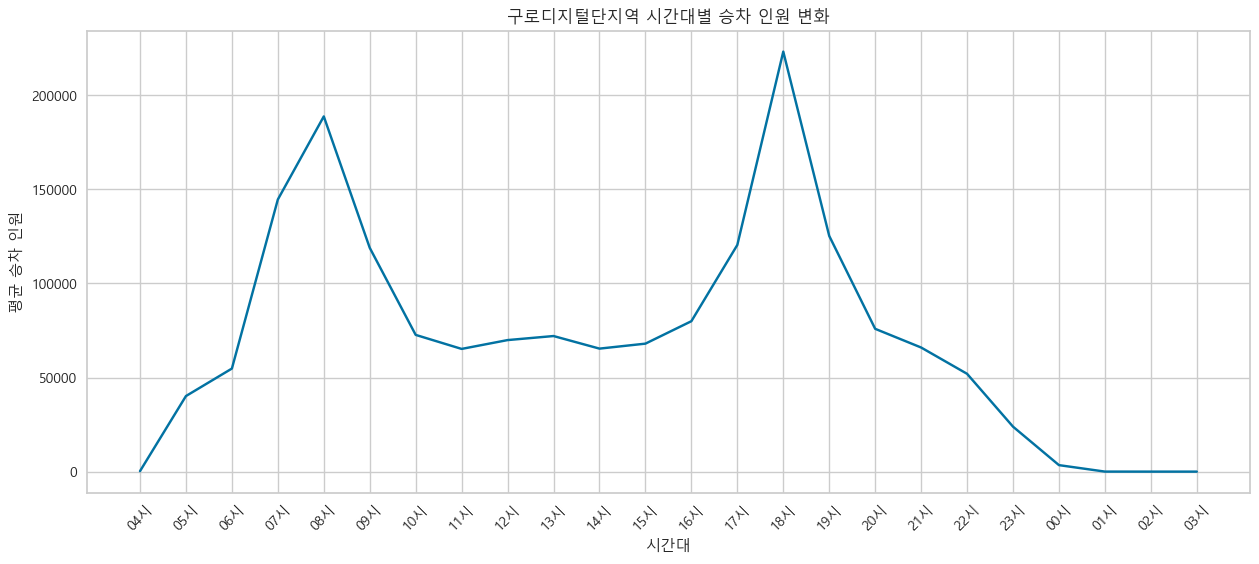

In [46]:
station_time_mean = data.groupby('지하철역')[on_col].mean()
station_time_mean.columns = [i[:3] for i in station_time_mean.columns]

# 월평균 승차 인원 기준으로 상위 5개 지하철역
top5_stations = mean_data.head(5)['지하철역'].tolist()

# 상위 5개 지하철역의 시간대별 승차 인원
for station in top5_stations:
    plt.figure(figsize=(15, 6))
    sns.lineplot(data=station_time_mean.loc[station])
    plt.title(f'{station}역 시간대별 승차 인원 변화')
    plt.xlabel('시간대')
    plt.ylabel('평균 승차 인원')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()